In [134]:
#Este documento sirve de ejemplo de uso de las funciones ToolBox del grupo california

In [135]:
# Importar toolbox
import ToolBox_Californiano as tb
import pandas as pd
import numpy as np

In [136]:
from importlib import reload
reload(tb)
dir(tb)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'clasifica_variables',
 'describe_df',
 'f_oneway',
 'get_features_cat_regression',
 'get_features_num_regression',
 'np',
 'pd',
 'pearsonr',
 'plot_features_cat_regression',
 'plot_features_num_regression',
 'plt',
 'sns']

In [137]:
#Importar dataframe
df = pd.read_csv('../data/dataset_viajes_jun23.csv')
df.head()

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23


In [138]:
tb.describe_df(df)

COL_N,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
DATA_TYPE,object,object,object,int64,object,bool,float64,int64,float64,object,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,5,11,11,45,4,2,501,113,600,347,1
CARDIN (%),0.01,0.02,0.02,0.08,0.01,0.0,0.84,0.19,1.0,0.58,0.0


In [139]:
tb.clasifica_variables(df,20,0.05)

,nombre_variable,tipo_sugerido
0,aircompany,Categórica
1,origen,Categórica
2,destino,Categórica
3,distancia,Numérica Continua
4,avion,Categórica
5,con_escala,Binaria
6,consumo_kg,Numérica Continua
7,duracion,Numérica Continua
8,ingresos,Numérica Continua
9,id_vuelo,Categórica de excesiva cardinalidad


In [140]:
target= "ingresos"
df_clasificacion=tb.clasifica_variables(df.drop(columns=target),20,0.05)
numericas = df_clasificacion[(df_clasificacion["tipo_sugerido"]=="Numérica Continua") | (df_clasificacion["tipo_sugerido"]=="Numérica Discreta")]["nombre_variable"].to_list()
categoricas = df_clasificacion[(df_clasificacion["tipo_sugerido"]=="Categórica") | (df_clasificacion["tipo_sugerido"]=="Binaria")]["nombre_variable"].to_list()
print(numericas)
print(categoricas)

['consumo_kg', 'duracion', 'ingresos']
['aircompany', 'origen', 'destino', 'avion', 'con_escala']


In [141]:
tb.get_features_num_regression(df,target,0.1,0.05)

La correlacion entre las columnas numericas y el target debe superar: 0.1
---------------------------------------------------------------------------
<consumo_kg> corr con target: 0.7623414561187762
<duracion> corr con target: 0.9859625296678584
<ingresos> corr con target: 0.9288326149230471

¿Es la correlacion estadisticamente significativa?
---------------------------------------------------------------------------
<consumo_kg>: p_value = 4.185444357441731e-115  Si
<duracion>: p_value = 0.0  Si
<ingresos>: p_value = 4.791204624235064e-260  Si


['consumo_kg', 'duracion', 'ingresos']

Columna: consumo_kg, p-value: 4.185444357441731e-115
Columna: duracion, p-value: 0.0
Columna: ingresos, p-value: 4.791204624235064e-260


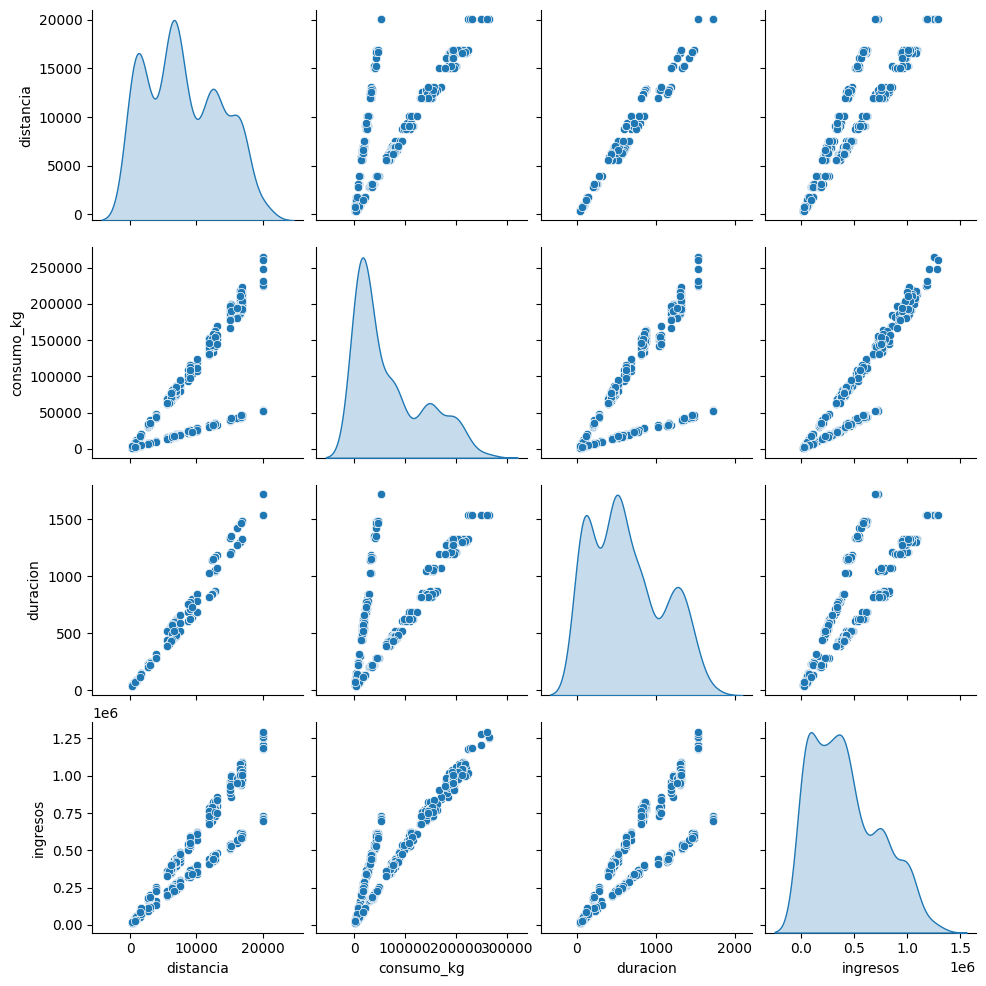

['consumo_kg', 'duracion', 'ingresos']

In [142]:
tb.plot_features_num_regression(df,target,numericas,0.05,0.05)

In [143]:
tb.get_features_cat_regression(df,target,0.05)

['aircompany', 'origen', 'destino', 'avion', 'con_escala']

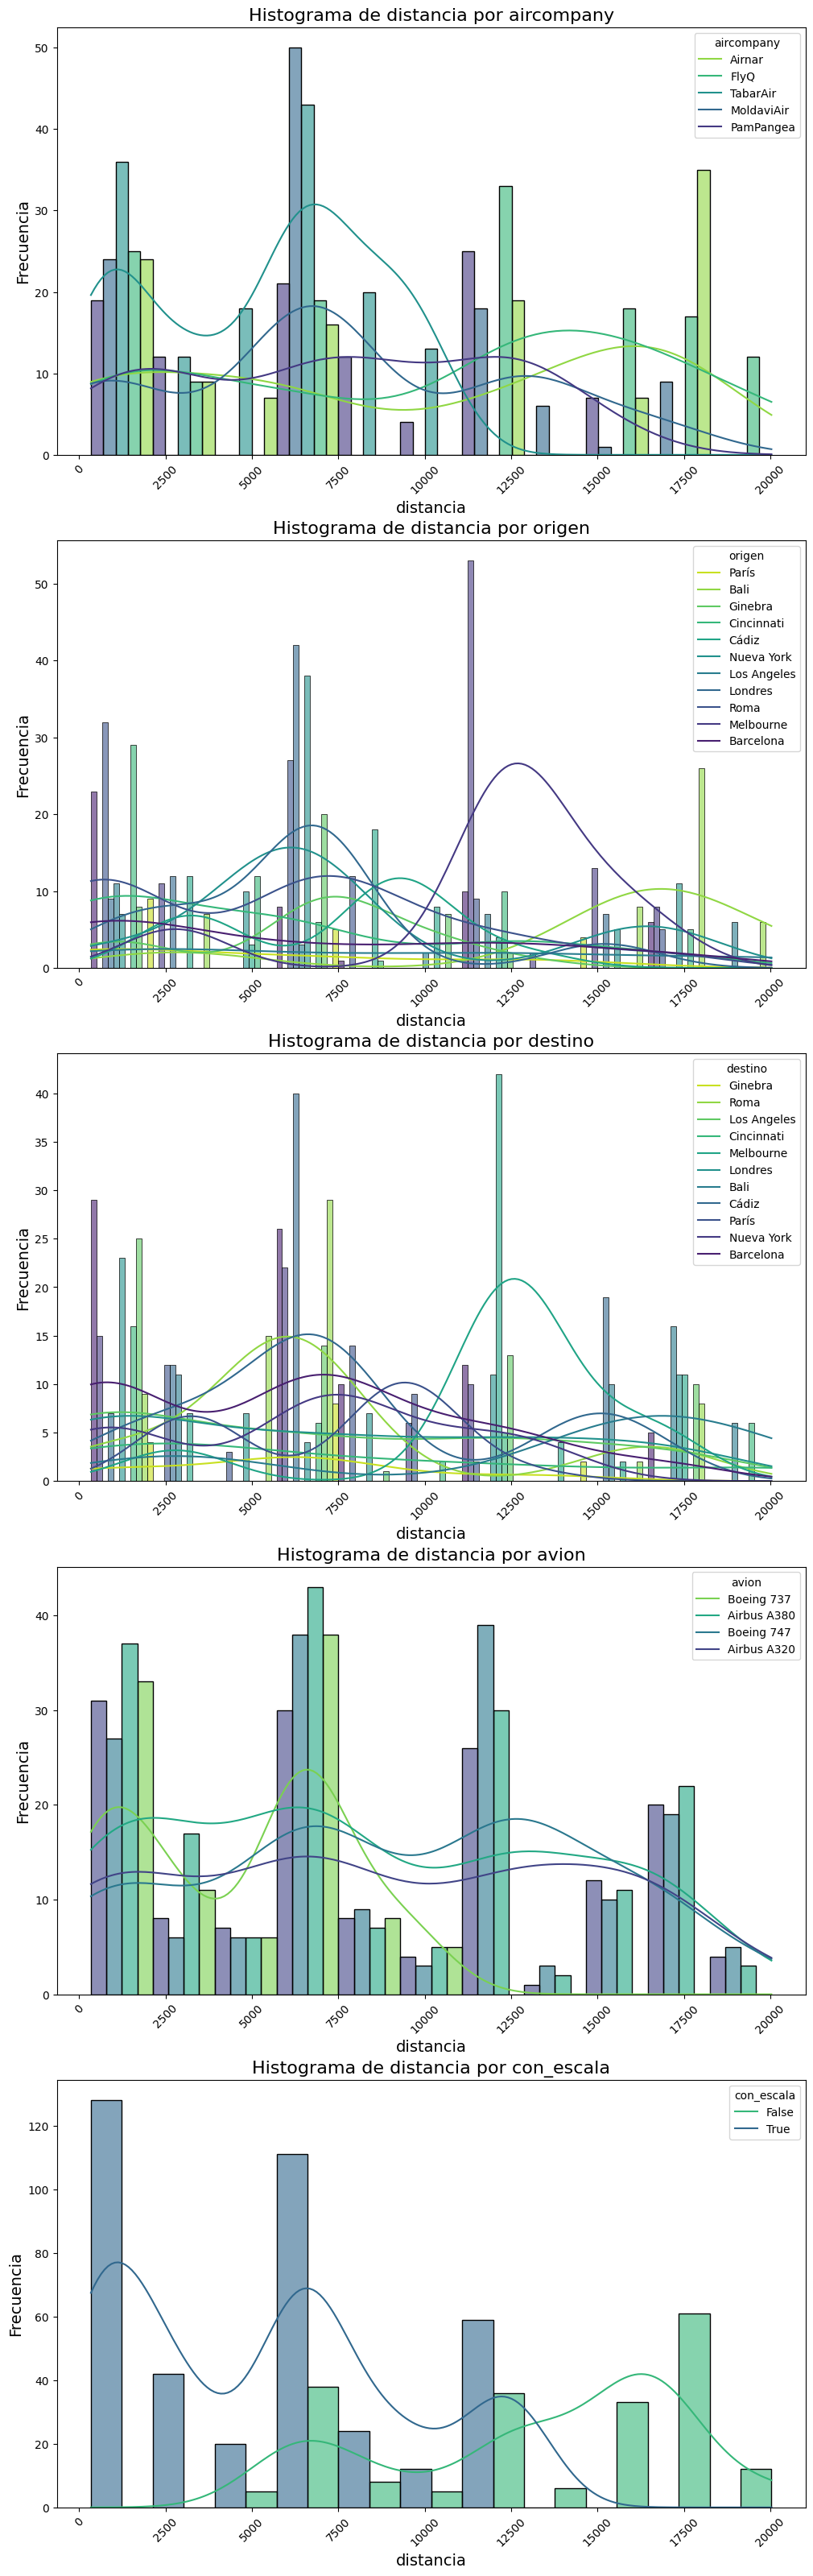

['aircompany', 'origen', 'destino', 'avion', 'con_escala']

In [144]:
# ejecuta analisis de variables categoricas significativas con target mostrando histograma de los datos
tb.plot_features_cat_regression(df,target,categoricas,0.05,False)